In [1]:
import pandas as pd
import numpy as np
from scipy import stats, integrate

In [2]:
#read train and test data
file1=r"C:/Users/User/Documents/Project 3/counterfeit_train.csv"
file2=r"C:/Users/User/Documents/Project 3/counterfeit_test.csv"
bd_train=pd.read_csv(file1)
bd_test=pd.read_csv(file2)

In [3]:
#we concat train and test data for data preprocessing
bd_test['Counterfeit_Sales']=np.NaN
bd_train['data']='train'
bd_test['data']="test"
bd_test=bd_test[bd_train.columns]
bd=pd.concat([bd_train,bd_test],axis=0)

In [4]:
bd.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,train
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,train
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,train
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,train
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,train


In [5]:
bd.shape

(8523, 13)

In [17]:
#Include ID columns in modeling process doesn't make sense,so we will remove all the ID columns
bd=bd.drop(['Medicine_ID','DistArea_ID'],axis=1)

In [6]:
list(zip(bd.columns,bd.dtypes,bd.nunique()))

[('Medicine_ID', dtype('O'), 1557),
 ('Counterfeit_Weight', dtype('float64'), 415),
 ('DistArea_ID', dtype('O'), 10),
 ('Active_Since', dtype('int64'), 9),
 ('Medicine_MRP', dtype('float64'), 5970),
 ('Medicine_Type', dtype('O'), 16),
 ('SidEffect_Level', dtype('O'), 2),
 ('Availability_rating', dtype('float64'), 7884),
 ('Area_Type', dtype('O'), 4),
 ('Area_City_Type', dtype('O'), 3),
 ('Area_dist_level', dtype('O'), 4),
 ('Counterfeit_Sales', dtype('float64'), 3142),
 ('data', dtype('O'), 2)]

In [7]:
#stats.pearsonr(bd['Counterfeit_Weight'],bd['Counterfeit_Sales'])

(nan, 1.0)

In [8]:
round(bd.groupby("Counterfeit_Weight")['Counterfeit_Sales'].mean(),2)

Counterfeit_Weight
5.855     2051.81
5.890     1380.68
5.910     2409.79
5.915     4191.02
5.935     2297.49
6.085     1679.63
6.105     3993.28
6.180      787.12
6.205     3069.15
6.220     3535.54
6.300     3718.31
6.330     1476.23
6.335     4040.89
6.395     1833.93
6.410     2820.81
6.450     2094.42
6.455     3580.49
6.475     1247.68
6.490     2686.98
6.510     4515.94
6.560     3658.78
6.605     3604.46
6.620     1895.68
6.625      418.60
6.640     1771.84
6.665     2403.35
6.700     2415.34
6.705     2601.43
6.725     1559.34
6.740     2678.33
           ...   
19.800    1949.71
19.900    1821.94
20.000    1786.97
20.050    2671.97
20.150    2551.50
20.300    1992.42
20.400    2278.27
20.500    2662.03
20.550    1499.86
20.650    1994.61
20.800    2607.20
20.900    1702.97
21.000    2145.95
21.050    2883.00
21.150    2302.82
21.300    1184.22
21.400    2113.09
21.500    2447.16
21.550    3245.99
21.650    2446.19
21.800    1765.11
21.900    1849.16
22.000    1910.25
22.050   

In [9]:
#correlation between Area_city_type and Area_Type
stats.spearmanr(bd['Area_City_Type'],bd['Area_Type'])

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.020772926815508547, pvalue=0.0551510653809175)

In [10]:
round(bd.groupby("Medicine_Type")['Counterfeit_Sales'].mean(),)

Medicine_Type
Analgesics            2091.0
Antacids              2260.0
Antibiotics           2397.0
Antifungal            2444.0
Antimalarial          2193.0
Antipyretics          2293.0
Antiseptics           2367.0
Antiviral             2583.0
Cardiac               2363.0
Hreplacements         2376.0
Mstablizers           2045.0
MuscleRelaxants       2091.0
OralContraceptives    2245.0
Statins               2309.0
Stimulants            2280.0
Tranquilizers         2084.0
Name: Counterfeit_Sales, dtype: float64

In [11]:
bd['Medicine_Type'].value_counts()

Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: Medicine_Type, dtype: int64

In [12]:
#Now we will make (n-1) dummy of Medicine Type column
MDType_Dumy=pd.get_dummies(bd['Medicine_Type'],prefix="MdType")
bd=pd.concat([bd,MDType_Dumy],axis=1)
bd.drop(['Medicine_Type','MdType_Antiviral'],axis=1,inplace=True)

In [13]:
bd['SidEffect_Level'].value_counts()

mild        5517
critical    3006
Name: SidEffect_Level, dtype: int64

In [14]:
#Now we will convert mild into  1 and 0's 
bd['SidEffect_Level']=np.where(bd['SidEffect_Level']=='mild',1,0)

In [15]:
bd['SidEffect_Level'].value_counts()

1    5517
0    3006
Name: SidEffect_Level, dtype: int64

In [18]:
bd.head()

,Counterfeit_Weight,Active_Since,Medicine_MRP,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,...,MdType_Antipyretics,MdType_Antiseptics,MdType_Cardiac,MdType_Hreplacements,MdType_Mstablizers,MdType_MuscleRelaxants,MdType_OralContraceptives,MdType_Statins,MdType_Stimulants,MdType_Tranquilizers
0,13.100,1995,160.2366,0,0.070422,DownTown,Tier 1,Small,1775.5026,train,...,0,0,0,0,0,0,0,0,0,0
1,NaN,1983,110.4384,1,0.013000,CityLimits,Tier 3,Medium,3069.1520,train,...,0,0,0,0,1,0,0,0,0,0
2,9.025,1995,259.4092,1,0.060783,DownTown,Tier 1,Small,2603.0920,train,...,0,0,1,0,0,0,0,0,0,0
3,11.800,1995,99.9830,1,0.065555,DownTown,Tier 1,Small,1101.7130,train,...,0,0,0,0,0,0,1,0,0,0
4,NaN,1983,56.4402,0,0.248859,MidTownResidential,Tier 1,Small,158.9402,train,...,0,0,0,1,0,0,0,0,0,0


In [19]:
bd['Availability_rating'].nunique()
#There are too many unique values in Availability_rating column so we leave this column as it is

7884

In [20]:
%matplotlib inline

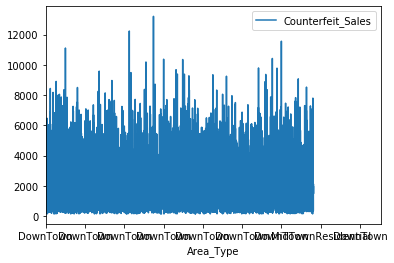

In [21]:
bd.plot('Area_Type','Counterfeit_Sales')

In [22]:
bd['Area_Type'].value_counts()

DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: Area_Type, dtype: int64

In [23]:
#3 dummies of area type column
bd['ArType_Dwntwn'] = np.where(bd['Area_Type']=='DownTown',1,0)
bd['ArType_MidtwnResid']=np.where(bd['Area_Type']=='MildTownResidential',1,0)
bd['ArType_CityLimits']=np.where(bd['Area_Type']=='CityLimits',1,0)
bd.drop(['Area_Type'],axis=1,inplace=True)

In [24]:
bd.head()

,Counterfeit_Weight,Active_Since,Medicine_MRP,SidEffect_Level,Availability_rating,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,MdType_Analgesics,...,MdType_Hreplacements,MdType_Mstablizers,MdType_MuscleRelaxants,MdType_OralContraceptives,MdType_Statins,MdType_Stimulants,MdType_Tranquilizers,ArType_Dwntwn,ArType_MidtwnResid,ArType_CityLimits
0,13.100,1995,160.2366,0,0.070422,Tier 1,Small,1775.5026,train,0,...,0,0,0,0,0,0,0,1,0,0
1,NaN,1983,110.4384,1,0.013000,Tier 3,Medium,3069.1520,train,0,...,0,1,0,0,0,0,0,0,0,1
2,9.025,1995,259.4092,1,0.060783,Tier 1,Small,2603.0920,train,0,...,0,0,0,0,0,0,0,1,0,0
3,11.800,1995,99.9830,1,0.065555,Tier 1,Small,1101.7130,train,0,...,0,0,0,1,0,0,0,1,0,0
4,NaN,1983,56.4402,0,0.248859,Tier 1,Small,158.9402,train,0,...,1,0,0,0,0,0,0,0,0,0


In [25]:
bd['Area_City_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Area_City_Type, dtype: int64

In [27]:
round(bd.groupby("Area_City_Type")['Counterfeit_Sales'].mean(),2)

In [28]:
#area city type column dummies
bd['AreaCity_Tier3']=np.where(bd['Area_City_Type']=='Tier 3',1,0)
bd['AreaCity_Tier2']=np.where(bd['Area_City_Type']=='Tier 2',1,0)
bd.drop(['Area_City_Type'],axis=1,inplace=True)

In [29]:
bd['Area_dist_level'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Area_dist_level, dtype: int64

In [30]:
round(bd.groupby('Area_dist_level')['Counterfeit_Sales'].mean(),2)

Area_dist_level
High       2407.02
Medium     2775.05
Small      1998.41
Unknown    1950.35
Name: Counterfeit_Sales, dtype: float64

In [31]:
#(n-1) dummies of Area_dist_level column
ArDistLevel_dum=pd.get_dummies(bd['Area_dist_level'],prefix="AreaDistLevel")
bd=pd.concat([bd,ArDistLevel_dum],1)
bd.drop(['Area_dist_level','AreaDistLevel_High'],1,inplace=True)

In [32]:
bd.head()

,Counterfeit_Weight,Active_Since,Medicine_MRP,SidEffect_Level,Availability_rating,Counterfeit_Sales,data,MdType_Analgesics,MdType_Antacids,MdType_Antibiotics,...,MdType_Stimulants,MdType_Tranquilizers,ArType_Dwntwn,ArType_MidtwnResid,ArType_CityLimits,AreaCity_Tier3,AreaCity_Tier2,AreaDistLevel_Medium,AreaDistLevel_Small,AreaDistLevel_Unknown
0,13.100,1995,160.2366,0,0.070422,1775.5026,train,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,NaN,1983,110.4384,1,0.013000,3069.1520,train,0,0,0,...,0,0,0,0,1,1,0,1,0,0
2,9.025,1995,259.4092,1,0.060783,2603.0920,train,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,11.800,1995,99.9830,1,0.065555,1101.7130,train,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,NaN,1983,56.4402,0,0.248859,158.9402,train,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
#check for Null values  
bd.isnull().sum()

Counterfeit_Weight           1463
Active_Since                    0
Medicine_MRP                    0
SidEffect_Level                 0
Availability_rating             0
Counterfeit_Sales            1705
data                            0
MdType_Analgesics               0
MdType_Antacids                 0
MdType_Antibiotics              0
MdType_Antifungal               0
MdType_Antimalarial             0
MdType_Antipyretics             0
MdType_Antiseptics              0
MdType_Cardiac                  0
MdType_Hreplacements            0
MdType_Mstablizers              0
MdType_MuscleRelaxants          0
MdType_OralContraceptives       0
MdType_Statins                  0
MdType_Stimulants               0
MdType_Tranquilizers            0
ArType_Dwntwn                   0
ArType_MidtwnResid              0
ArType_CityLimits               0
AreaCity_Tier3                  0
AreaCity_Tier2                  0
AreaDistLevel_Medium            0
AreaDistLevel_Small             0
AreaDistLevel_

In [34]:
#removing Null values from training data
#we only impute null values in train data,not on test data
for col in bd.columns:
    if (col not in ['Counterfeit_Sales','data']) and (bd[col].isnull().sum()>0):
        bd.loc[bd[col].isnull(),col]=bd.loc[bd['data']=='train',col].mean()

In [ ]:
bd['Counterfeit_Weight'].isnull().sum()

In [35]:
bd.dtypes

Counterfeit_Weight           float64
Active_Since                   int64
Medicine_MRP                 float64
SidEffect_Level                int32
Availability_rating          float64
Counterfeit_Sales            float64
data                          object
MdType_Analgesics              uint8
MdType_Antacids                uint8
MdType_Antibiotics             uint8
MdType_Antifungal              uint8
MdType_Antimalarial            uint8
MdType_Antipyretics            uint8
MdType_Antiseptics             uint8
MdType_Cardiac                 uint8
MdType_Hreplacements           uint8
MdType_Mstablizers             uint8
MdType_MuscleRelaxants         uint8
MdType_OralContraceptives      uint8
MdType_Statins                 uint8
MdType_Stimulants              uint8
MdType_Tranquilizers           uint8
ArType_Dwntwn                  int32
ArType_MidtwnResid             int32
ArType_CityLimits              int32
AreaCity_Tier3                 int32
AreaCity_Tier2                 int32
A

In [36]:
#we have done with data preprocessing and now we will again split our train and test data 
bd_train=bd[bd['data']=='train']
del bd_train['data']
bd_test=bd[bd['data']=="test"]
bd_test.drop(['data','Counterfeit_Sales'],1,inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:
del bd

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [39]:
#Splitting train data into 80% train  and 20% test part#
bd_train1,bd_train2=train_test_split(bd_train,test_size=0.2,random_state=2)

In [ ]:
#first we build an linear reg model on training data
#x_train1,y_train1=bd_train1....80% splitted data 
#x_test,y_test=bd_train2...20% splitted data 
#2)then we first fit the model on x_train1,y_train1
#3)then we do prediction on x_test
#4)then we find MAE on y_test and predicted data

In [40]:
#We separate target and predictors from 80% train data
x_train1=bd_train1.drop(['Counterfeit_Sales'],axis=1)
y_train1=bd_train1['Counterfeit_Sales']

In [41]:
#Linear regression model
lm=LinearRegression()

In [42]:
lm.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#We separate target and predictors from 20% test data
x_test=bd_train2.drop(['Counterfeit_Sales'],1)
y_test=bd_train2['Counterfeit_Sales']

In [44]:
#We'll make prediction on 20% test data
predicted_train=lm.predict(x_test)

In [45]:
predicted_train

array([1150.61366486,  965.0132471 , 3813.28634115, ..., 1449.29825819,
       3996.76026413, 1616.49747281])

In [46]:
from sklearn.metrics import mean_absolute_error

In [47]:
#Mean absolute error on y_actual with y_predicted 
MAE=mean_absolute_error(y_test,predicted_train)

Score = 1-(MAE/1660)
Score



0.49662519882933975

In [48]:
from sklearn.metrics import r2_score
r2_score(predicted_train,y_test)

0.17594325389451926

In [49]:
list(zip(x_train1.columns,lm.coef_))


[('Counterfeit_Weight', -5.022129198898146),
 ('Active_Since', 94.43547049496352),
 ('Medicine_MRP', 15.435677150730136),
 ('SidEffect_Level', 0.5453903731820191),
 ('Availability_rating', -416.0242459555075),
 ('MdType_Analgesics', -395.88018764039225),
 ('MdType_Antacids', -388.1602073929538),
 ('MdType_Antibiotics', -313.8123695108383),
 ('MdType_Antifungal', -385.5788530211425),
 ('MdType_Antimalarial', -380.0363451122564),
 ('MdType_Antipyretics', -437.8128211145498),
 ('MdType_Antiseptics', -408.4651433023285),
 ('MdType_Cardiac', -298.33950811320875),
 ('MdType_Hreplacements', -413.1079111711758),
 ('MdType_Mstablizers', -390.61693040914804),
 ('MdType_MuscleRelaxants', -271.80415571713183),
 ('MdType_OralContraceptives', -382.16907486407996),
 ('MdType_Statins', -324.7991752174354),
 ('MdType_Stimulants', -351.20345941783444),
 ('MdType_Tranquilizers', -457.8296389050098),
 ('ArType_Dwntwn', 691.2544263897204),
 ('ArType_MidtwnResid', -5.4569682106375694e-12),
 ('ArType_CityLim

In [ ]:
#we got 0.49 score on training data,Now we'll find the score on whole training data
#x,train,y_train=bd_train
#then we will fit the model on x_train,y_train
#then we do prediiction on bd_test


In [50]:
#Separate target and predictors from whole train data
x_train=bd_train.drop(['Counterfeit_Sales'],axis=1)
y_train=bd_train['Counterfeit_Sales']

In [51]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
#we make the prediction on whole test data
test_prediction=lm.predict(bd_test)

In [53]:
test_prediction

array([2796.30969141, 3713.20582252, 1219.90113144, ..., 2991.32134759,
       3803.86321784, 3554.61136439])

# Random Forest

In [54]:

from sklearn.ensemble import RandomForestRegressor
#RandomForestRegressor is used for regression problem

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
RFModel = RandomForestRegressor()

In [57]:
RFModel

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
bd_train.shape

(6818, 29)

In [59]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],#No of trees in an forest
              'max_features':[5,10,15,20,25],
              'max_depth':[None,5,10,15,20,30,50,70],
               'min_samples_leaf':[1,2,5,10,15,20], 
               'min_samples_split':[2,5,10,15,20],
                'bootstrap':[True,False]
                }


In [ ]:
n_iter_search = 10

random_search = RandomizedSearchCV(RFModel, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='neg_mean_absolute_error',cv=10)
random_search.fit(x_train1, y_train1)

In [ ]:
rf=random_search.best_estimator_

In [ ]:
rf.fit(x_train1,y_train1)

In [ ]:
train_predicted=rf.predict(x_test)

In [ ]:
MAE1=mean_absolute_error(y_test,train_predicted)

In [ ]:
Score = 1-(MAE1/1660)
Score



In [ ]:
rf.fit(x_train,y_train)

In [ ]:
test_predict=rf.predict(bd_test)

In [ ]:
test_predict.shape

In [ ]:
pd.DataFrame(test_predict).to_csv("mysubmission.csv",index=False)